# **Blood Analyst Task**

## **Period Symptoms data Analysis**

### **Submitted by:**

**Sanskar Sharma, B.Tech CSE at MIT Academy of Engineering, Alandi(D), Pune**

### **Contact:**

**+91 6261614589**

## **E-mail:**

**sansskarsharma@gmail.com**


# **1. Drive Mounting (Only if Colab/ColabPro)**

In [1]:
import os
print("Current working directory before")
print(os.getcwd())

Current working directory before
/content


In [2]:
#Mount your drive on your desired drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Change Path directory to the OCBC_Hack-it path's location
os.chdir('/content/drive/MyDrive/Blood Analyst/')

In [4]:
ls

 correlation_matrix.png    Period_symptom_data.xlsx
 Period_symptom_data.csv  'Period Symptoms analysis'




---

## **Necessary Imports**

In [5]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set Jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

# display warnings only the first time
import warnings
warnings.filterwarnings('ignore')

# **2. Load, conversion and save data**

In [ ]:
# Period symptom data
period_df=pd.read_excel('Period_symptom_data.xlsx', index_col=0)

In [ ]:
period_df.to_csv (r'Period_symptom_data.csv', index = None, header=True)

In [6]:
period_df=pd.read_csv("Period_symptom_data.csv")

In [7]:
print(period_df.shape)
period_df.head()

(14513, 13)


record_id         user_id  \
0  unique ID of each record row  unique user ID   
1                           127             252   
2                           128             257   
3                           129             257   
4                           130             263   

                                                acne  backache  bloating  \
0  symptom name and user's scoring on severity of...       NaN       NaN   
1                                                  0       0.0       0.0   
2                                                  0       0.0       0.0   
3                                                  0       0.0       0.0   
4                                                  0       0.0       0.0   

   cramp  diarrhea  dizzy  headache  mood  nausea  sore                  date  
0    NaN       NaN    NaN       NaN   NaN     NaN   NaN  record creation date  
1    0.0       0.0    0.0       0.0   0.0     0.0   0.0   2015-11-04 00:00:00  
2   46.0       0.0    0.0       0.0   0.0     0.0   0.0   2015-10-04 00:00:00  
3    0.0       0.0   27.0      48.0   0.0     0.0   0.0   2015-11-04 00:00:00  
4    0.0       0.0    0.0       0.0   0.0     0.0   0.0   2015-11-04 00:00:00

In [8]:
period_df.tail()

record_id user_id acne  backache  bloating  cramp  diarrhea  dizzy  \
14508     13728    6953    0       0.0       0.0    0.0       0.0    0.0   
14509     13729    6453   12      22.0       0.0   79.0       0.0    0.0   
14510     13730    6713    0      31.0      23.0   36.0       0.0    0.0   
14511     13731    2253    0       0.0       0.0    0.0       0.0    0.0   
14512     13732    4592    0       0.0       0.0   68.0       0.0    0.0   

       headache  mood  nausea  sore     date  
14508       0.0   0.0     0.0   0.0  22/3/19  
14509       0.0  55.0     2.0  59.0  22/3/19  
14510      25.0   0.0     0.0  17.0  22/3/19  
14511      36.0   0.0     0.0  13.0  22/3/19  
14512       0.0   0.0     0.0   0.0  22/3/19

# **3. Data CLeaning & Handling**

In [9]:
#Drop duplicate rows from the data
period_df.drop_duplicates(keep='first',inplace=True)

In [10]:
#Remove the data description row at index 0
period_df.drop(period_df.index[0],inplace=True)

In [11]:
#Data type of each feature
period_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13512 entries, 1 to 13512
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   record_id  13512 non-null  object 
 1   user_id    13512 non-null  object 
 2   acne       13512 non-null  object 
 3   backache   13512 non-null  float64
 4   bloating   13512 non-null  float64
 5   cramp      13512 non-null  float64
 6   diarrhea   13512 non-null  float64
 7   dizzy      13512 non-null  float64
 8   headache   13512 non-null  float64
 9   mood       13512 non-null  float64
 10  nausea     13512 non-null  float64
 11  sore       13512 non-null  float64
 12  date       13512 non-null  object 
dtypes: float64(9), object(4)
memory usage: 1.4+ MB


In [12]:
#Change the object data type to int, float and datetime as required
period_df["record_id"]=period_df["record_id"].astype(int)
period_df["user_id"]=period_df["user_id"].astype(int)
period_df["acne"]=period_df["acne"].astype(float)
period_df['date'] =  period_df["date"].apply(pd.to_datetime)

In [13]:
#Updated datatypes
period_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13512 entries, 1 to 13512
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   record_id  13512 non-null  int64         
 1   user_id    13512 non-null  int64         
 2   acne       13512 non-null  float64       
 3   backache   13512 non-null  float64       
 4   bloating   13512 non-null  float64       
 5   cramp      13512 non-null  float64       
 6   diarrhea   13512 non-null  float64       
 7   dizzy      13512 non-null  float64       
 8   headache   13512 non-null  float64       
 9   mood       13512 non-null  float64       
 10  nausea     13512 non-null  float64       
 11  sore       13512 non-null  float64       
 12  date       13512 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 1.4 MB


In [14]:
#Store numerical (symptom) columns name in a list for future use in code
symptoms=["acne",	"backache",	"bloating",	"cramp","diarrhea",	"dizzy"	,"headache"	,"mood"	,"nausea",	"sore"]

In [15]:
#Create additional columns for analysis

#Mean of all symptomns
period_df["mean_of_symptoms"]=period_df[["acne","backache","bloating","cramp","diarrhea","dizzy","headache","mood","nausea","sore"]].mean(axis=1)

#Classify the mean symptom value into categories as low, normal, high and extreme period severity
period_df["period_severity"] = pd.cut(period_df["mean_of_symptoms"],4, precision=0, labels=["low","normal","high","extreme"])

#Extract year, month and dayofweek from date column
period_df['year'] = pd.DatetimeIndex(period_df['date']).year
period_df['month'] = pd.DatetimeIndex(period_df['date']).month
period_df['day_of_week'] = period_df['date'].dt.dayofweek

In [16]:
#data with year 1958, 2061, 2059, 1958, 2058 can be dropped 
period_df["year"].value_counts()

2016    5494
2017    3122
2018    2953
2015    1554
2019     376
2059       5
1958       2
2061       2
2058       2
1959       1
2027       1
Name: year, dtype: int64

In [17]:
#Considering only following years
period_df=period_df[period_df["year"].isin([2015,2016,2017,2018,2019])]

In [18]:
#Remove user data with 0 severity value for all symptoms
period_df=period_df[period_df["mean_of_symptoms"]!=0]

In [19]:
print(period_df.shape)
period_df.head()

(11177, 18)


record_id  user_id  acne  backache  bloating  cramp  diarrhea  dizzy  \
2         128      257   0.0       0.0       0.0   46.0       0.0    0.0   
3         129      257   0.0       0.0       0.0    0.0       0.0   27.0   
7         134      271   0.0       0.0      15.0   22.0       0.0    0.0   
9         136      273   0.0       0.0       0.0   20.0       0.0    0.0   
11        138      262  71.0       0.0      45.0    0.0       0.0    0.0   

    headache  mood  nausea  sore       date  mean_of_symptoms period_severity  \
2        0.0   0.0     0.0   0.0 2015-10-04               4.6             low   
3       48.0   0.0     0.0   0.0 2015-11-04               7.5             low   
7        0.0  47.0     0.0  37.0 2015-11-04              12.1             low   
9        0.0   0.0    42.0  21.0 2015-12-04               8.3             low   
11       0.0  53.0     0.0   0.0 2015-12-04              16.9             low   

    year  month  day_of_week  
2   2015     10            6  
3   2015     11            2  
7   2015     11            2  
9   2015     12            4  
11  2015     12            4

# **4. Data Analysis and Visualization**

In [21]:
#to calculate correlation matrix
period_symptom_corr=period_df[["acne",	"backache",	"bloating",	"cramp","diarrhea",	"dizzy"	,"headache"	,"mood"	,"nausea",	"sore"]]

In [22]:
#replacing 0 with nan values to get proper correlation between symptoms
period_symptom_corr = period_symptom_corr.replace({0:np.nan})

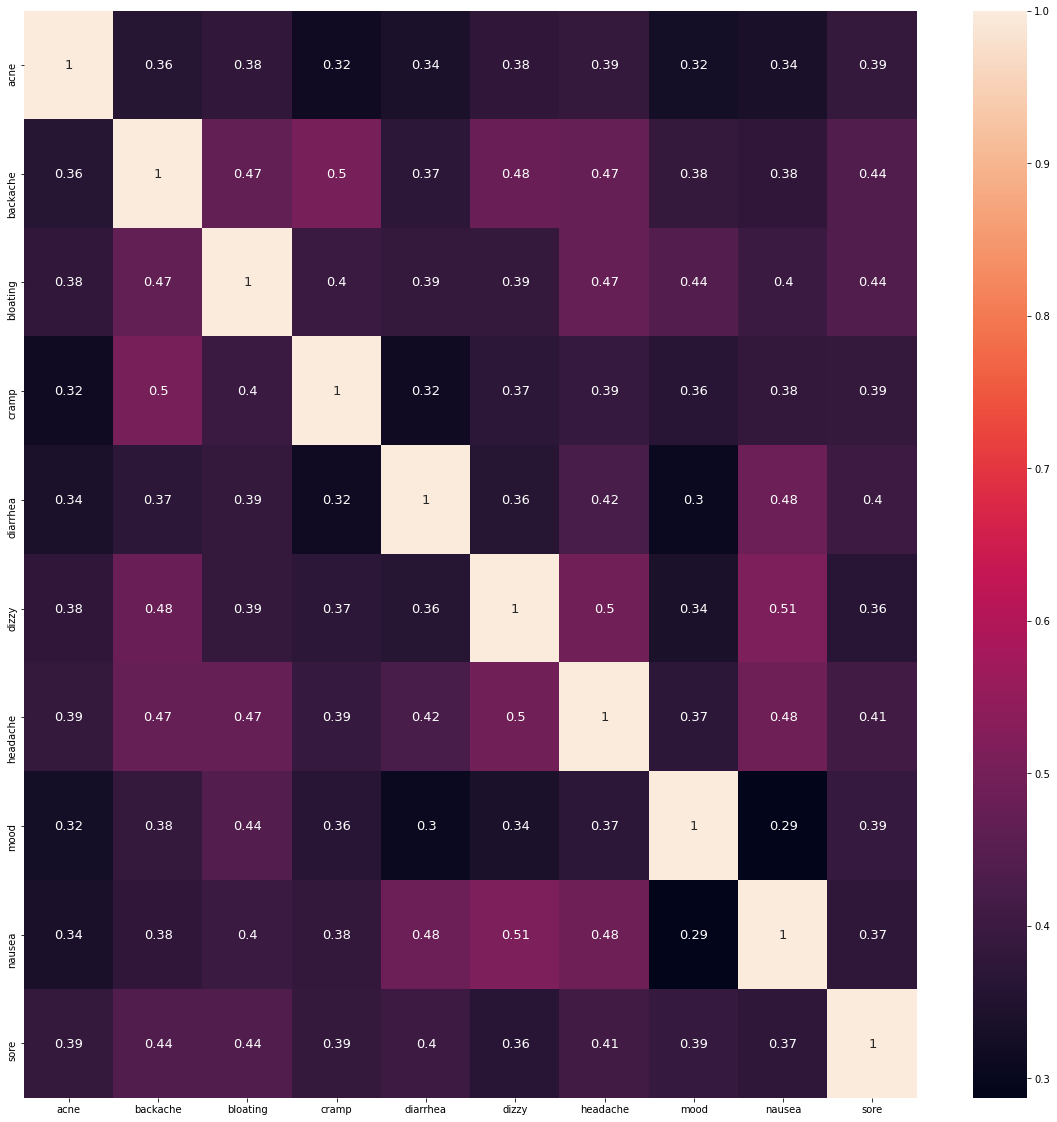

In [23]:
#Pearson's correlation plot among various variables

fig, ax = plt.subplots(figsize=(20,20)) 

#Using min_periods=100 that means minimum 100 pair wise values should be not nan to be considered
sns.heatmap(period_symptom_corr.corr(method ='pearson',min_periods=100),annot=True,annot_kws={'size': 13})
#plt.savefig('correlation_matrix.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

### **Important correlation to understand (above 0.45).**


> These correlations are wise versa. Bold one(LHS) can trigger the other(RHS) if exceeds in its severity and the other(RHS) can trigger the bold one(LHS) too.


**(headache, bloating, cramp, nausea, dizzy, backache, diarrhea)**


> If a women faces any of these
above  mentioned
symptoms then there's a
50% chance that the other mentioned symptoms can be trigered directly or indirectly


> **Acne, soreness and mood swings** are the normal symptoms to face during Periods. There's a very less chance for it to trigger anything serious like diarrhea unless it's severity value is too high (above 75)







**Backache** - headache/ dizzy/ cramp/ bloating

**Diarrhea**- nausea

**Dizzy** - nausea/ headache

**Headache** - nausea


In [24]:
#Fraction of peopl with the following symptom dictionary
count_dict={}
for i in period_symptom_corr.columns:
    count_dict[i]=period_symptom_corr[i].count()/len(period_df["record_id"])

<BarContainer object of 10 artists>

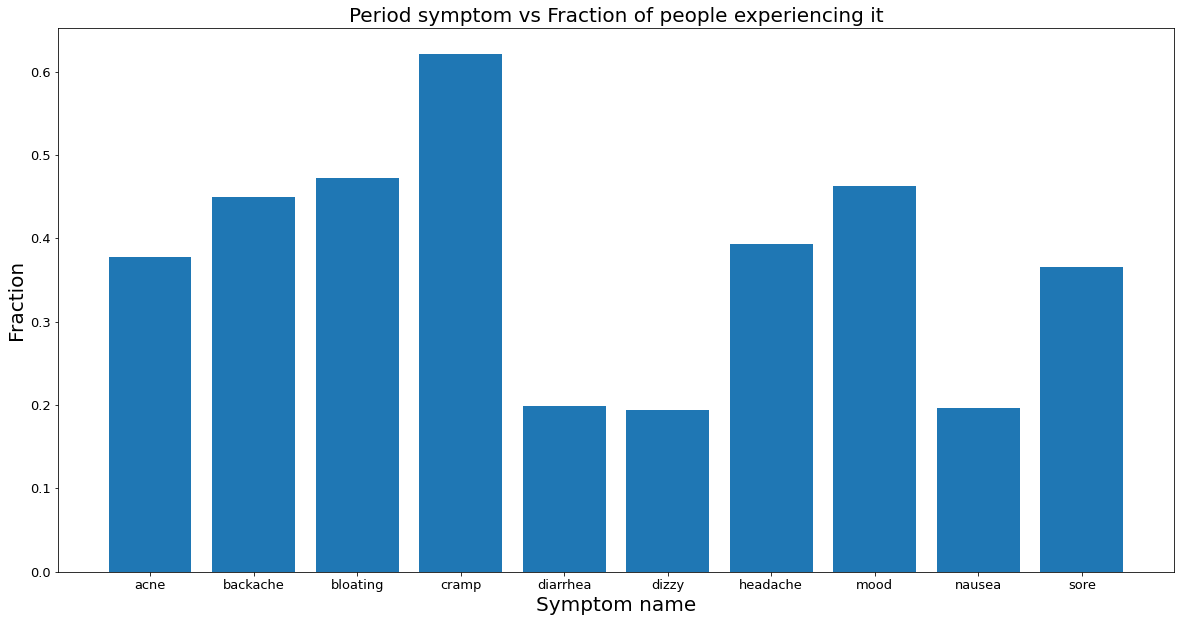

In [92]:
#Plotting number of records/total with a following symptom
fig = plt.figure(figsize = (20, 10))
 
plt.title("Period symptom vs Fraction of people experiencing it",fontdict={"fontsize":20})

plt.xlabel("Symptom name",fontdict={"fontsize":20})
plt.ylabel("Fraction",fontdict={"fontsize":20})

plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.bar(count_dict.keys(),count_dict.values())

### **Observations:**


1. It is observed that **CRAMPS** are the most common symptom of periods. So usual cramp with value under 50 seems to be of normal health condition.
2. After cramps, **MOOD swings, BLOATING,
BACKACHE,  SORENESS and ACNE**  are common symptomns during period.
3.It is recommended to go visit a doctor if women faces any symptoms of **NAUSEA, DIZZINESS or DIARRHEA,** as these are not common symptoms and leave deeper impacts on health issues.

In [76]:
#No. of patients with the following symptom dictionary
mean_dict={}
for i in symptoms:
    mean_dict[i]=period_df[i].mean()

<BarContainer object of 10 artists>

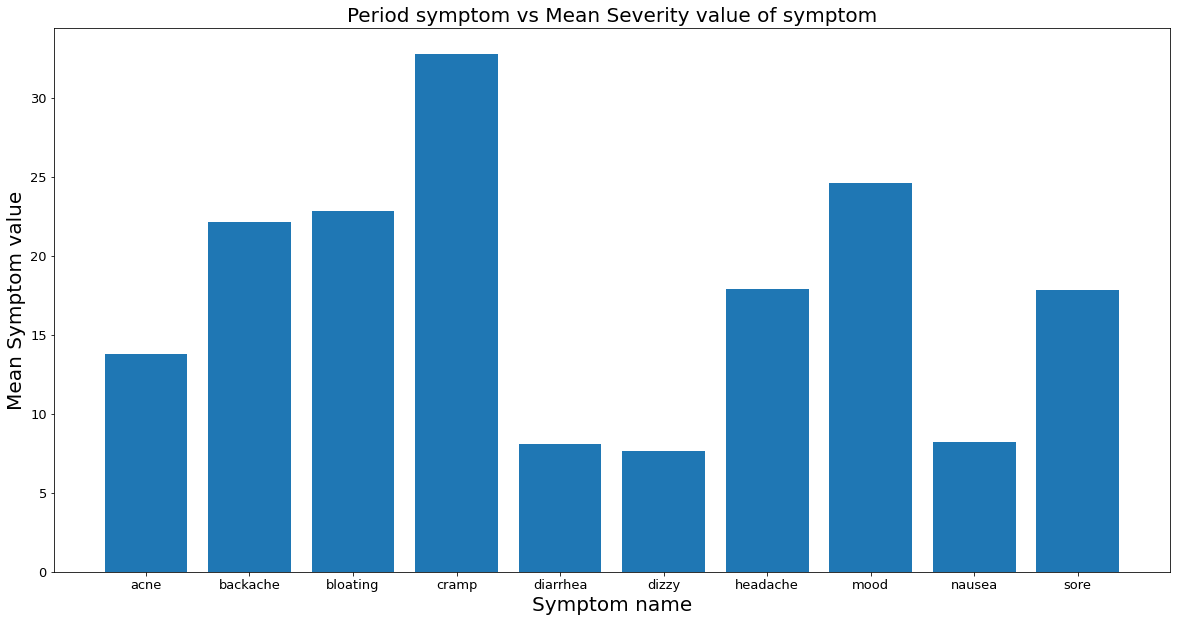

In [77]:
#Plotting mean severity of all records for specific severity
fig = plt.figure(figsize = (20, 10))
 
plt.title("Period symptom vs Mean Severity value of symptom",fontdict={"fontsize":20})

plt.xlabel("Symptom name",fontdict={"fontsize":20})
plt.ylabel("Mean Symptom value",fontdict={"fontsize":20})

plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.bar(mean_dict.keys(),mean_dict.values())

### **Observations:**

1. It is observed that cramp being most usual/normal symptom can have a higher seveirty value near to 35. Severity value of cramps exceeding 60 can get serious and one should recommend a doctor or a health professional.
2. Symptoms like nausea, dizziness and diarrhea have a threat even in a lower severity value. Hence, It is recommended to see a doctor in case one observes any on these symptoms. As these are the triggerers for other symptoms as well and are dangerous themselves.
3. Other symptoms values should'nt exceed 40 to be on the healthier side. 

In [42]:
#number of records per user display in descending order
period_df["user_id"].value_counts()

1133    180
514     124
2386     88
4011     80
4207     73
       ... 
5014      1
5022      1
5046      1
5054      1
4098      1
Name: user_id, Length: 3163, dtype: int64

In [43]:
#Description of the data and analysis
period_df.describe()

record_id       user_id          acne      backache      bloating  \
count  11177.000000  11177.000000  11177.000000  11177.000000  11177.000000   
mean    7044.211685   3557.520444     13.755927     22.097343     22.826161   
std     3905.942454   1890.210216     23.270007     30.563006     30.548715   
min      128.000000    252.000000      0.000000      0.000000      0.000000   
25%     3671.000000   2012.000000      0.000000      0.000000      0.000000   
50%     7094.000000   3475.000000      0.000000      0.000000      0.000000   
75%    10424.000000   5120.000000     22.000000     42.000000     42.000000   
max    13732.000000   7051.000000    100.000000    100.000000    100.000000   

              cramp      diarrhea         dizzy      headache          mood  \
count  11177.000000  11177.000000  11177.000000  11177.000000  11177.000000   
mean      32.749754      8.079717      7.656795     17.912409     24.609734   
std       34.598737     19.980274     19.296368     28.290457     33.092609   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       24.000000      0.000000      0.000000      0.000000      0.000000   
75%       58.000000      0.000000      0.000000     31.000000     46.000000   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

             nausea          sore  mean_of_symptoms          year  \
count  11177.000000  11177.000000      11177.000000  11177.000000   
mean       8.237184     17.806209         17.573123   2016.659837   
std       20.509535     29.123598         13.901553      1.031826   
min        0.000000      0.000000          0.100000   2015.000000   
25%        0.000000      0.000000          7.100000   2016.000000   
50%        0.000000      0.000000         13.900000   2016.000000   
75%        0.000000     30.000000         24.300000   2018.000000   
max      100.000000    100.000000        100.000000   2019.000000   

              month   day_of_week  
count  11177.000000  11177.000000  
mean       6.427038      2.996421  
std        3.496659      2.008256  
min        1.000000      0.000000  
25%        3.000000      1.000000  
50%        6.000000      3.000000  
75%       10.000000      5.000000  
max       12.000000      6.000000

In [44]:
print(period_df.shape)
period_df.head()

(11177, 18)


record_id  user_id  acne  backache  bloating  cramp  diarrhea  dizzy  \
2         128      257   0.0       0.0       0.0   46.0       0.0    0.0   
3         129      257   0.0       0.0       0.0    0.0       0.0   27.0   
7         134      271   0.0       0.0      15.0   22.0       0.0    0.0   
9         136      273   0.0       0.0       0.0   20.0       0.0    0.0   
11        138      262  71.0       0.0      45.0    0.0       0.0    0.0   

    headache  mood  nausea  sore       date  mean_of_symptoms period_severity  \
2        0.0   0.0     0.0   0.0 2015-10-04               4.6             low   
3       48.0   0.0     0.0   0.0 2015-11-04               7.5             low   
7        0.0  47.0     0.0  37.0 2015-11-04              12.1             low   
9        0.0   0.0    42.0  21.0 2015-12-04               8.3             low   
11       0.0  53.0     0.0   0.0 2015-12-04              16.9             low   

    year  month  day_of_week  
2   2015     10            6  
3   2015     11            2  
7   2015     11            2  
9   2015     12            4  
11  2015     12            4

In [45]:
#User record details with the maximum and minimum severity of symptoms
period_df[["record_id","user_id","date","mean_of_symptoms","period_severity"]].sort_values(by=["mean_of_symptoms"])

record_id  user_id       date  mean_of_symptoms period_severity
10577      10794     1020 2018-02-17               0.1             low
11878      12097     6608 2018-06-08               0.1             low
11960      12179     6679 2018-08-15               0.1             low
5870        6067     4062 2016-09-14               0.1             low
223          377      645 2015-09-14               0.1             low
...          ...      ...        ...               ...             ...
4140        4323     3093 2016-05-27              99.0         extreme
4139        4322     3093 2016-05-27              99.0         extreme
49           179      340 2015-04-19              99.5         extreme
6631        6829     4497 2016-11-15              99.8         extreme
10690      10907     5401 2018-04-03             100.0         extreme

[11177 rows x 5 columns]

In [47]:
#Severity and its counts
#Low: 0-25
#Normal: 25-50
#High: 50-75
#Extreme: 75-100
period_df["period_severity"].value_counts()

low        8539
normal     2269
high        341
extreme      28
Name: period_severity, dtype: int64

### **Observations:**

1. It is observed that most of the women manages well during their periods. hence theri overall severity (Mean of all symptoms severity) is low (0-25) and normal (25-50).
2. There are lesser records of women with high (50-75) and extreme (75+) severity. Hence, they need a professional advice and care to lower their severity index/value.

In [48]:
#Resetting the index value
period_df.reset_index(inplace=True)

#drop old index
period_df.drop(columns=["index"],inplace=True)

In [49]:
#Month wise mean of severity values of various symptoms
table = pd.pivot_table(period_df, values=["acne","backache","bloating","cramp","diarrhea","dizzy","headache","mood","nausea","sore"] ,index=['month'],
                     aggfunc=np.mean)
table

acne   backache   bloating      cramp  diarrhea     dizzy  \
month                                                                   
1      12.040109  20.548769  21.786691  32.090246  6.901550  7.733820   
2      13.405733  23.025358  21.565601  32.115766  6.729879  8.613010   
3      14.331237  22.419287  22.684486  33.780922  8.504193  7.730608   
4      13.910773  21.063112  22.896627  31.948857  8.932535  7.158868   
5      13.865256  21.301782  23.543430  31.246102  8.106904  7.808463   
6      15.271620  21.907430  23.876979  32.073082  9.415347  8.451888   
7      13.004494  23.282022  23.925843  33.971910  8.317978  7.424719   
8      12.917382  20.743562  22.572961  33.031116  8.222103  8.468884   
9      15.395745  22.741489  24.493617  32.711702  8.164894  7.352128   
10     13.210832  22.758221  21.997099  32.648936  7.766925  6.975822   
11     14.327991  21.923077  21.771368  32.949786  8.322650  7.054487   
12     13.877503  23.808009  23.275618  34.586572  7.936396  7.244994   

        headache       mood    nausea       sore  
month                                             
1      18.995442  24.004558  8.439380  17.958067  
2      18.328556  23.605292  8.631753  18.776185  
3      18.581761  25.849057  8.150943  20.058700  
4      19.319913  24.482046  7.116431  15.971708  
5      17.838530  24.603563  7.316258  16.799555  
6      17.096224  25.394641  7.784409  18.724726  
7      17.150562  24.334831  9.137079  17.047191  
8      18.258584  22.963519  9.004292  19.244635  
9      17.361702  26.326596  8.174468  17.064894  
10     17.016441  24.360735  8.586074  15.815280  
11     16.675214  23.970085  7.913462  18.361111  
12     18.143698  25.660777  8.492344  18.055359

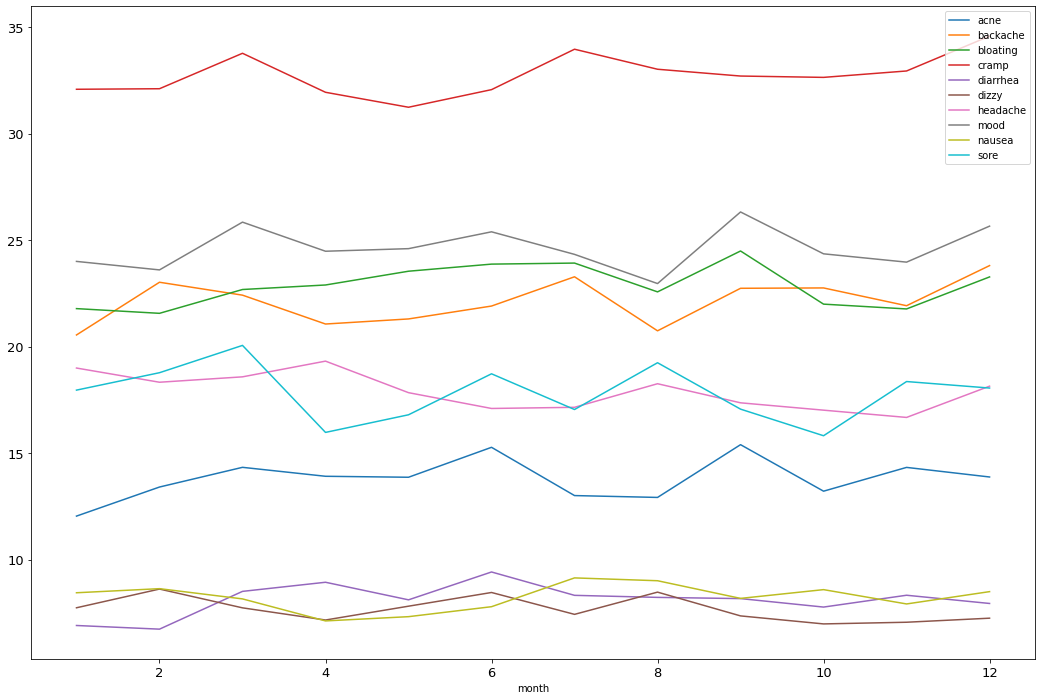

In [54]:
#Zig-zag trend of month vs mean severity of various symptoms 
table.plot(figsize=(18,12))

### **Observation:**
The zig zag pattern is the indication of menstrual cycle which comes in every 24-30 days for a teen-middle aged women. Hence, the values of different symptoms vary periodically 

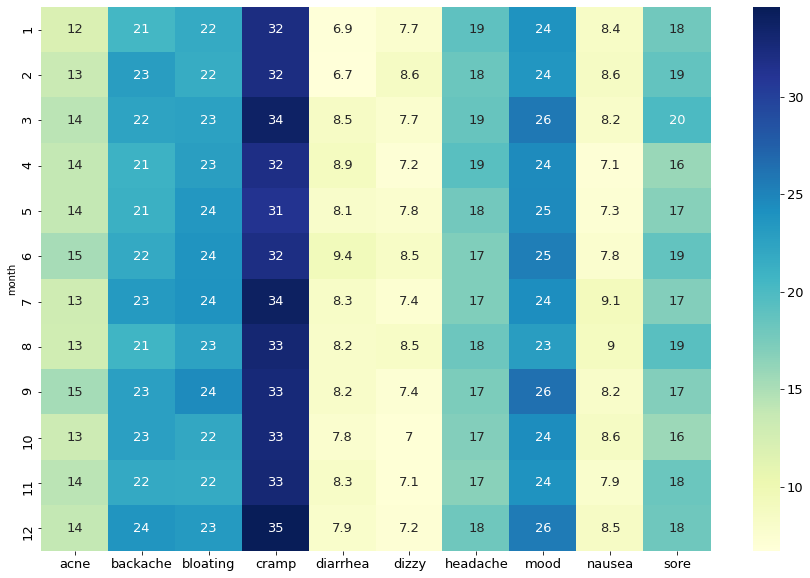

In [55]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu", annot=True,annot_kws={'size': 13})
plt.show()

### **Observation:**
It is observed that the mean value of symptoms over various records are higher in the month of July, for the given data. It could be explained by the hot and dry weather conditions for that very month

In [86]:
#Symptom count for period severity vs
table = pd.pivot_table(period_df, values=symptoms ,index=['period_severity'],
                     aggfunc=lambda x: len(x.unique()))
table

acne  backache  bloating  cramp  diarrhea  dizzy  headache  \
period_severity                                                                
low              100.0     100.0     101.0  101.0      95.0   89.0     101.0   
normal           100.0      97.0      98.0   99.0      96.0   99.0     100.0   
high              69.0      72.0      71.0   67.0      70.0   74.0      78.0   
extreme           14.0      10.0       6.0    8.0      13.0   11.0       5.0   

                  mood  nausea   sore  
period_severity                        
low              101.0    92.0  100.0  
normal            98.0    99.0   98.0  
high              72.0    72.0   75.0  
extreme            9.0    12.0   13.0

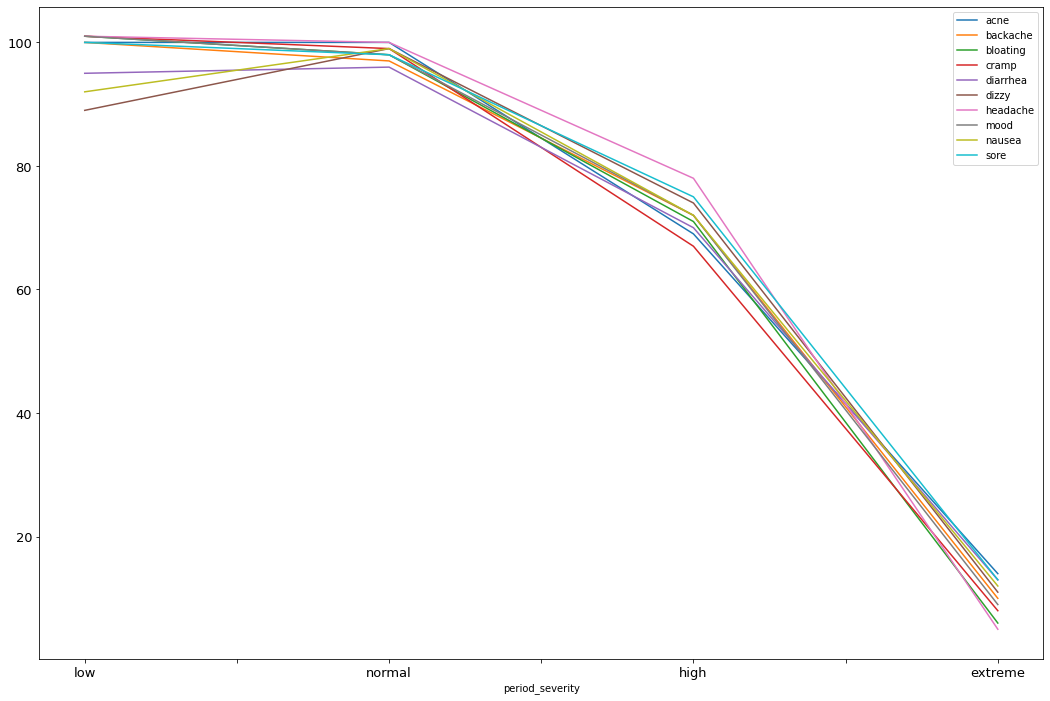

In [87]:
#Visualization for the above
table.plot(figsize=(18,12))

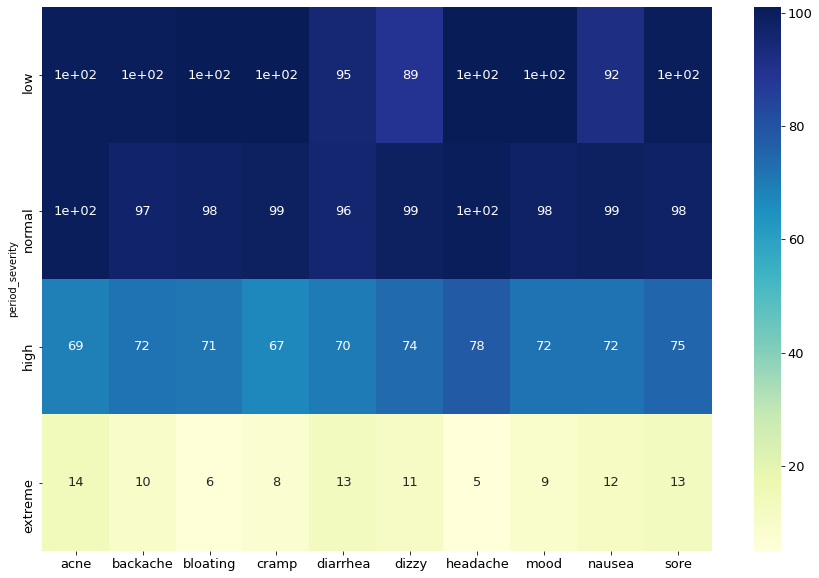

In [88]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu", annot=True,annot_kws={'size': 13})
plt.show()

### **Observations:**

1. It is observed that for the exterme conditions to occur the main reasons are extreme values of acne, even a low or little severe diarrhea and soreness.

2. Whereas, there are only a few cases with bloating, headache and mood swings that can be a cause for extreme severity.

In [93]:
#Year wise Mean symptom values for various symptoms
table = pd.pivot_table(period_df, values=["acne","backache","bloating","cramp","diarrhea","dizzy","headache","mood","nausea","sore"] ,index=['period_severity'],
                     aggfunc=np.mean)
table

acne   backache   bloating      cramp   diarrhea  \
period_severity                                                          
low              10.084553  13.541984  14.380607  23.790959   4.778311   
normal           23.860732  45.212869  46.416042  58.245042  16.789775   
high             33.475073  76.662757  71.381232  82.211144  28.222874   
extreme          74.392857  93.464286  95.464286  96.464286  63.750000   

                     dizzy   headache       mood     nausea       sore  
period_severity                                                         
low               3.599250  11.055510  16.158567   3.838389  11.569270  
normal           16.913618  34.776554  48.104892  18.473336  33.286029  
high             41.208211  70.815249  74.249267  43.961877  65.800587  
extreme          86.321429  98.142857  93.428571  85.142857  80.928571

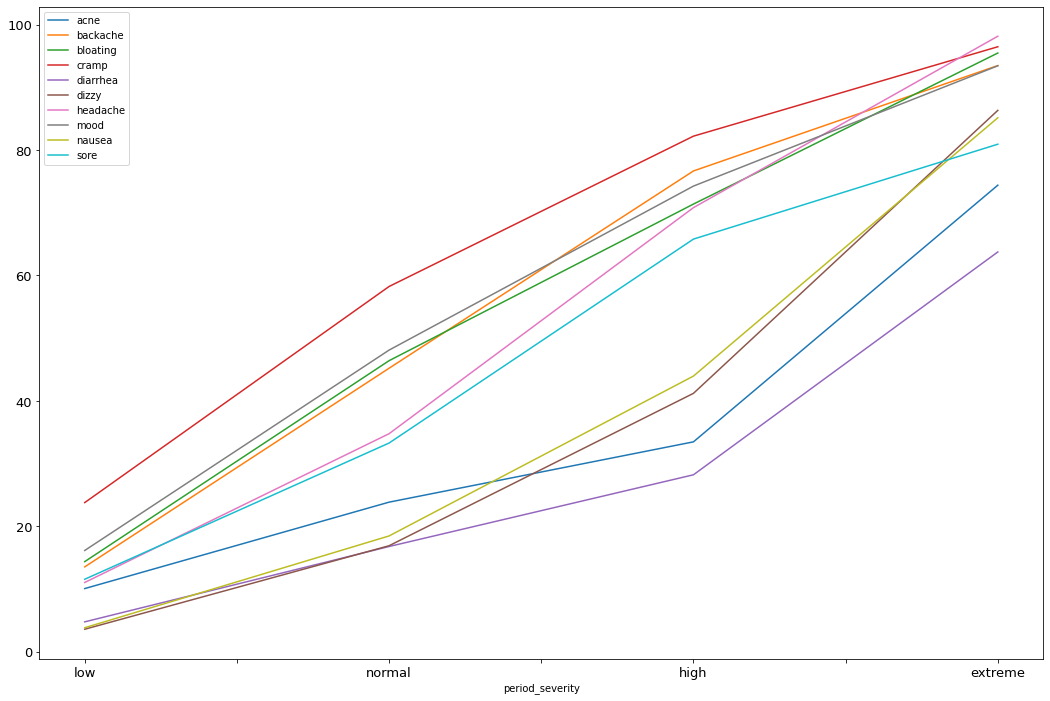

In [94]:
#Year wise Mean symptom values for various symptoms plot
table.plot(figsize=(18,12))

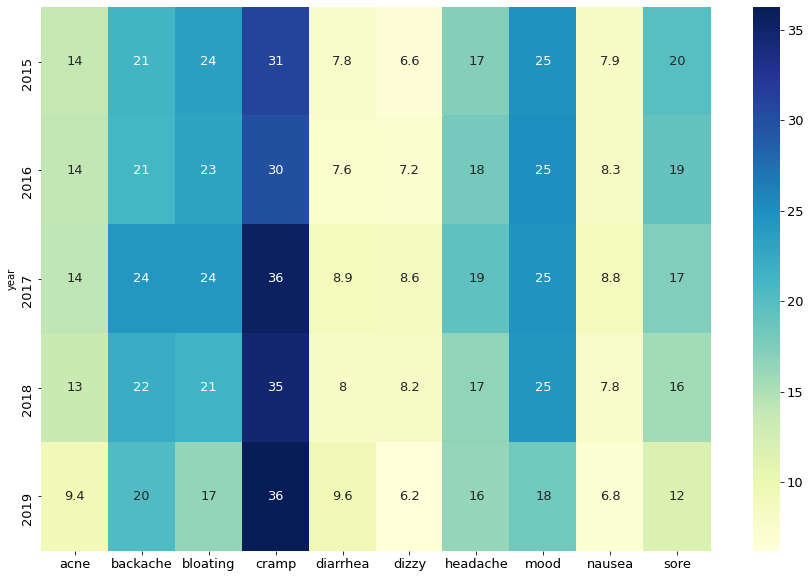

In [59]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu", annot=True,annot_kws={'size': 13})
plt.show()

### **Observations:**
2018 and 2019 have a lower mean value for various symptoms than the other. This could be due to awarness in menstrual hygiene and improvement in period related health services.

In [ ]:
print(period_df.shape)
period_df.head()

(11177, 18)


record_id  user_id  acne  backache  bloating  cramp  diarrhea  dizzy  \
0        128      257   0.0       0.0       0.0   46.0       0.0    0.0   
1        129      257   0.0       0.0       0.0    0.0       0.0   27.0   
2        134      271   0.0       0.0      15.0   22.0       0.0    0.0   
3        136      273   0.0       0.0       0.0   20.0       0.0    0.0   
4        138      262  71.0       0.0      45.0    0.0       0.0    0.0   

   headache  mood  nausea  sore       date  mean_of_symptoms period_severity  \
0       0.0   0.0     0.0   0.0 2015-10-04               4.6             low   
1      48.0   0.0     0.0   0.0 2015-11-04               7.5             low   
2       0.0  47.0     0.0  37.0 2015-11-04              12.1             low   
3       0.0   0.0    42.0  21.0 2015-12-04               8.3             low   
4       0.0  53.0     0.0   0.0 2015-12-04              16.9             low   

   year  month  day_of_week  
0  2015     10            6  
1  2015     11            2  
2  2015     11            2  
3  2015     12            4  
4  2015     12            4

In [61]:
temp=period_df.replace({0:np.nan})

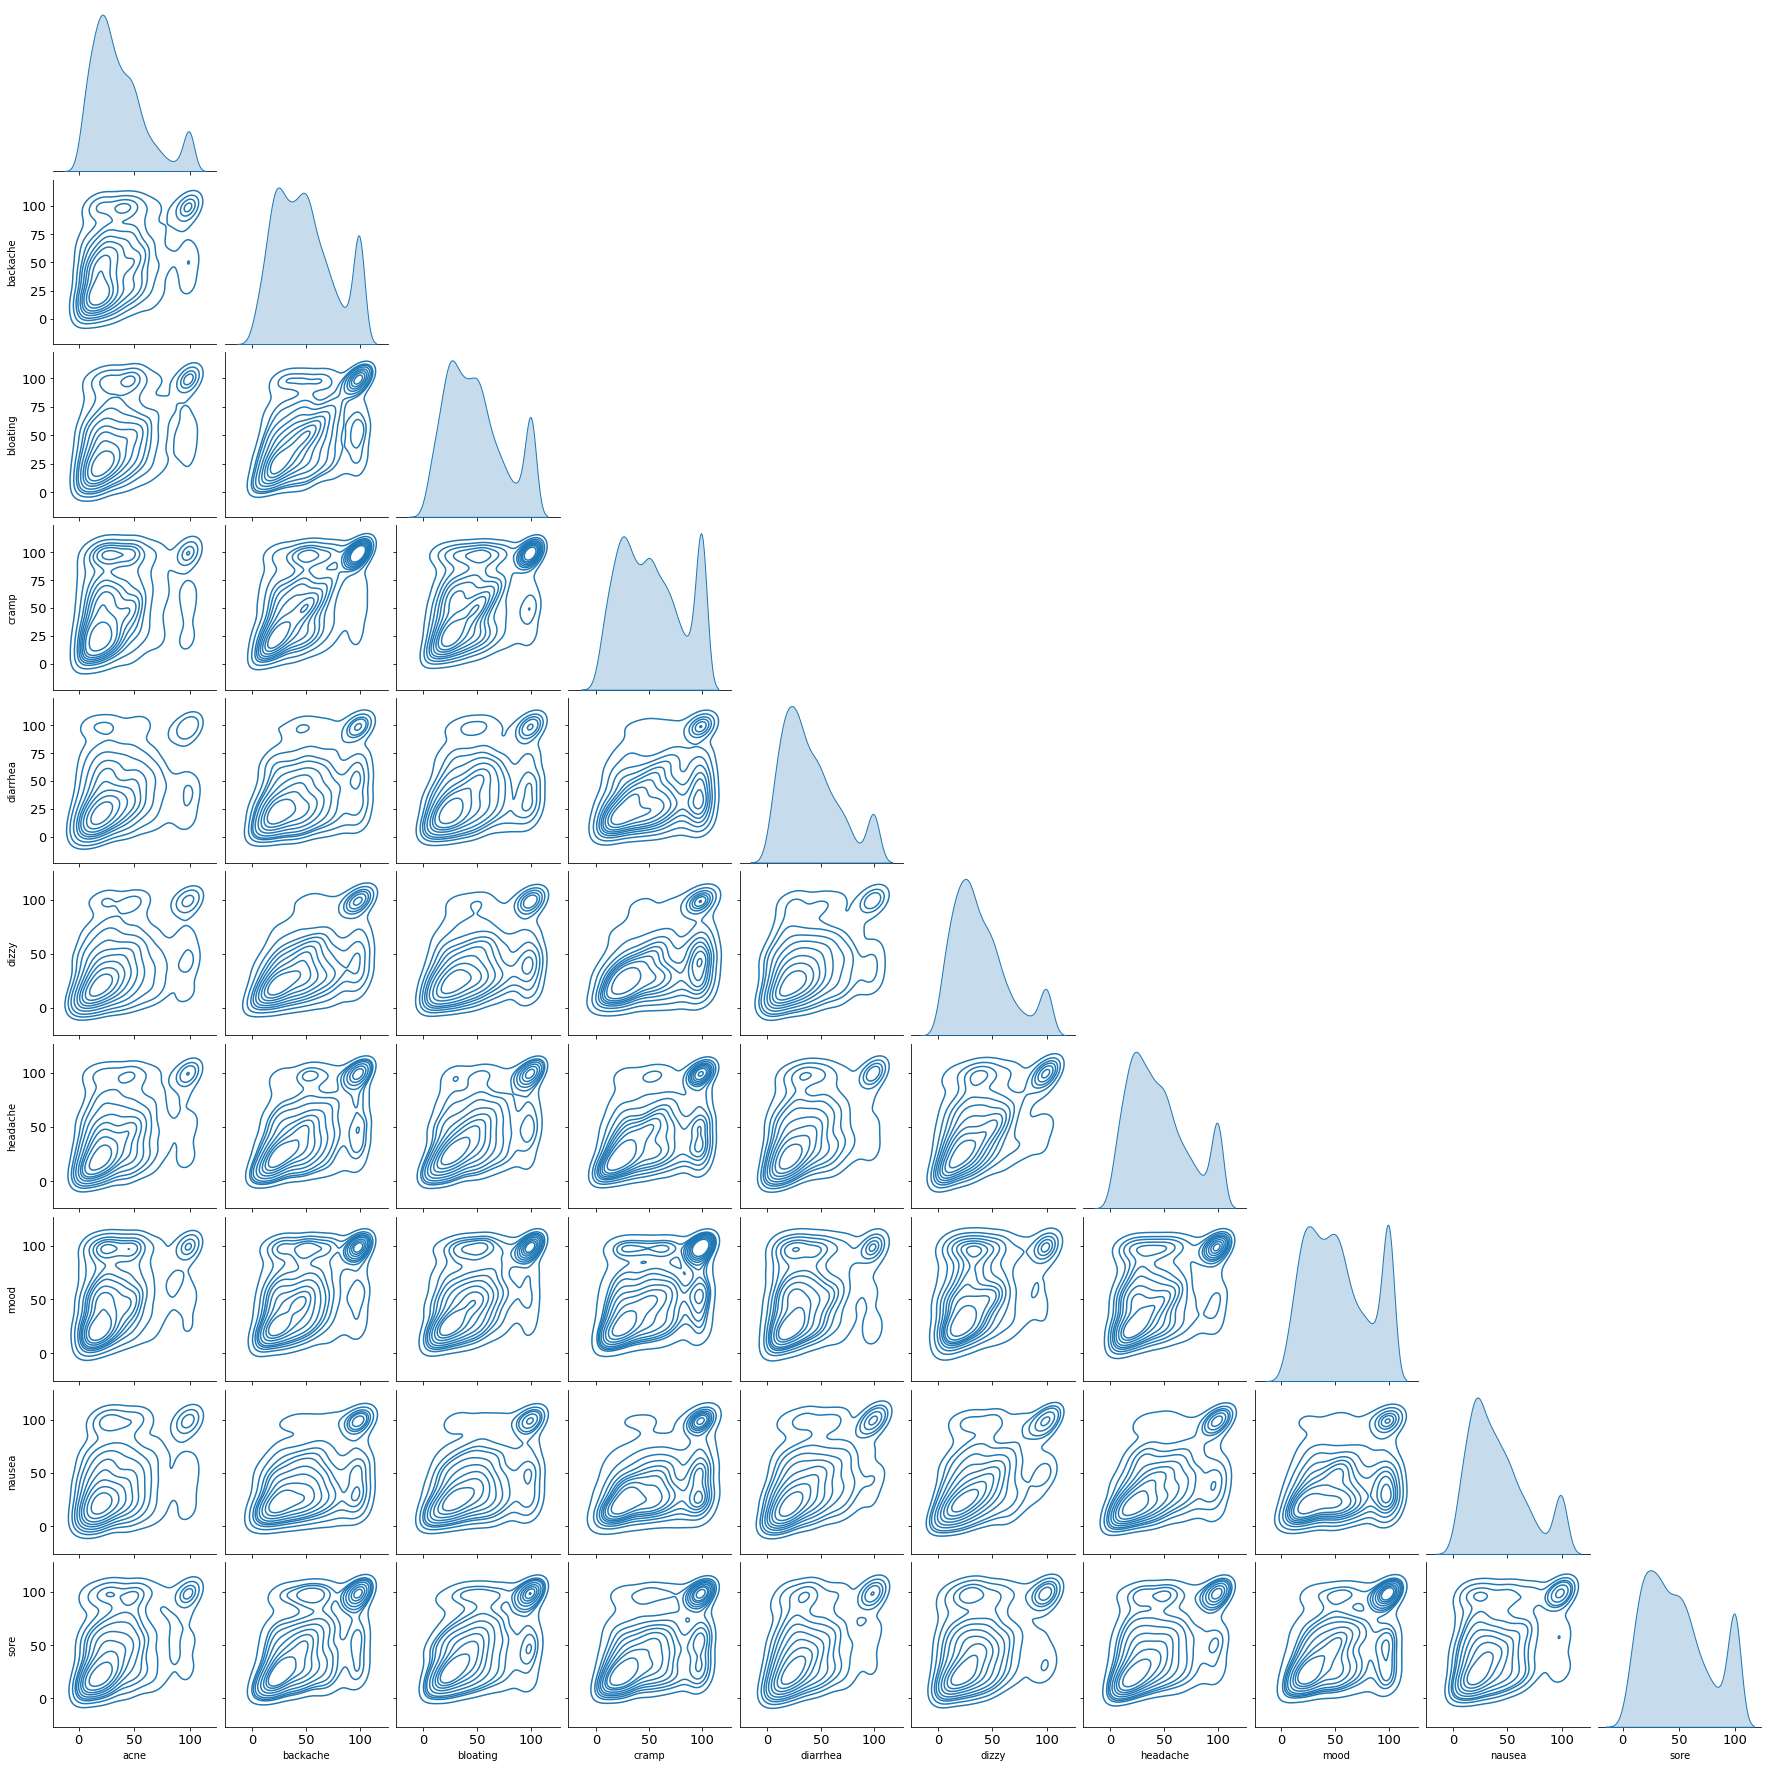

In [66]:
sns.pairplot(temp,x_vars=symptoms,y_vars=symptoms,kind="kde",corner=True)

### **Observations:**

1. The paired symptomns with dark/thicker circle right top corner indicates that there's a higher chance that if one of the pair value is high the other symptom of pair can also be triggered to the same extent.

2. Lighter/thinner circles indicate that there's low correlation between those pairs.

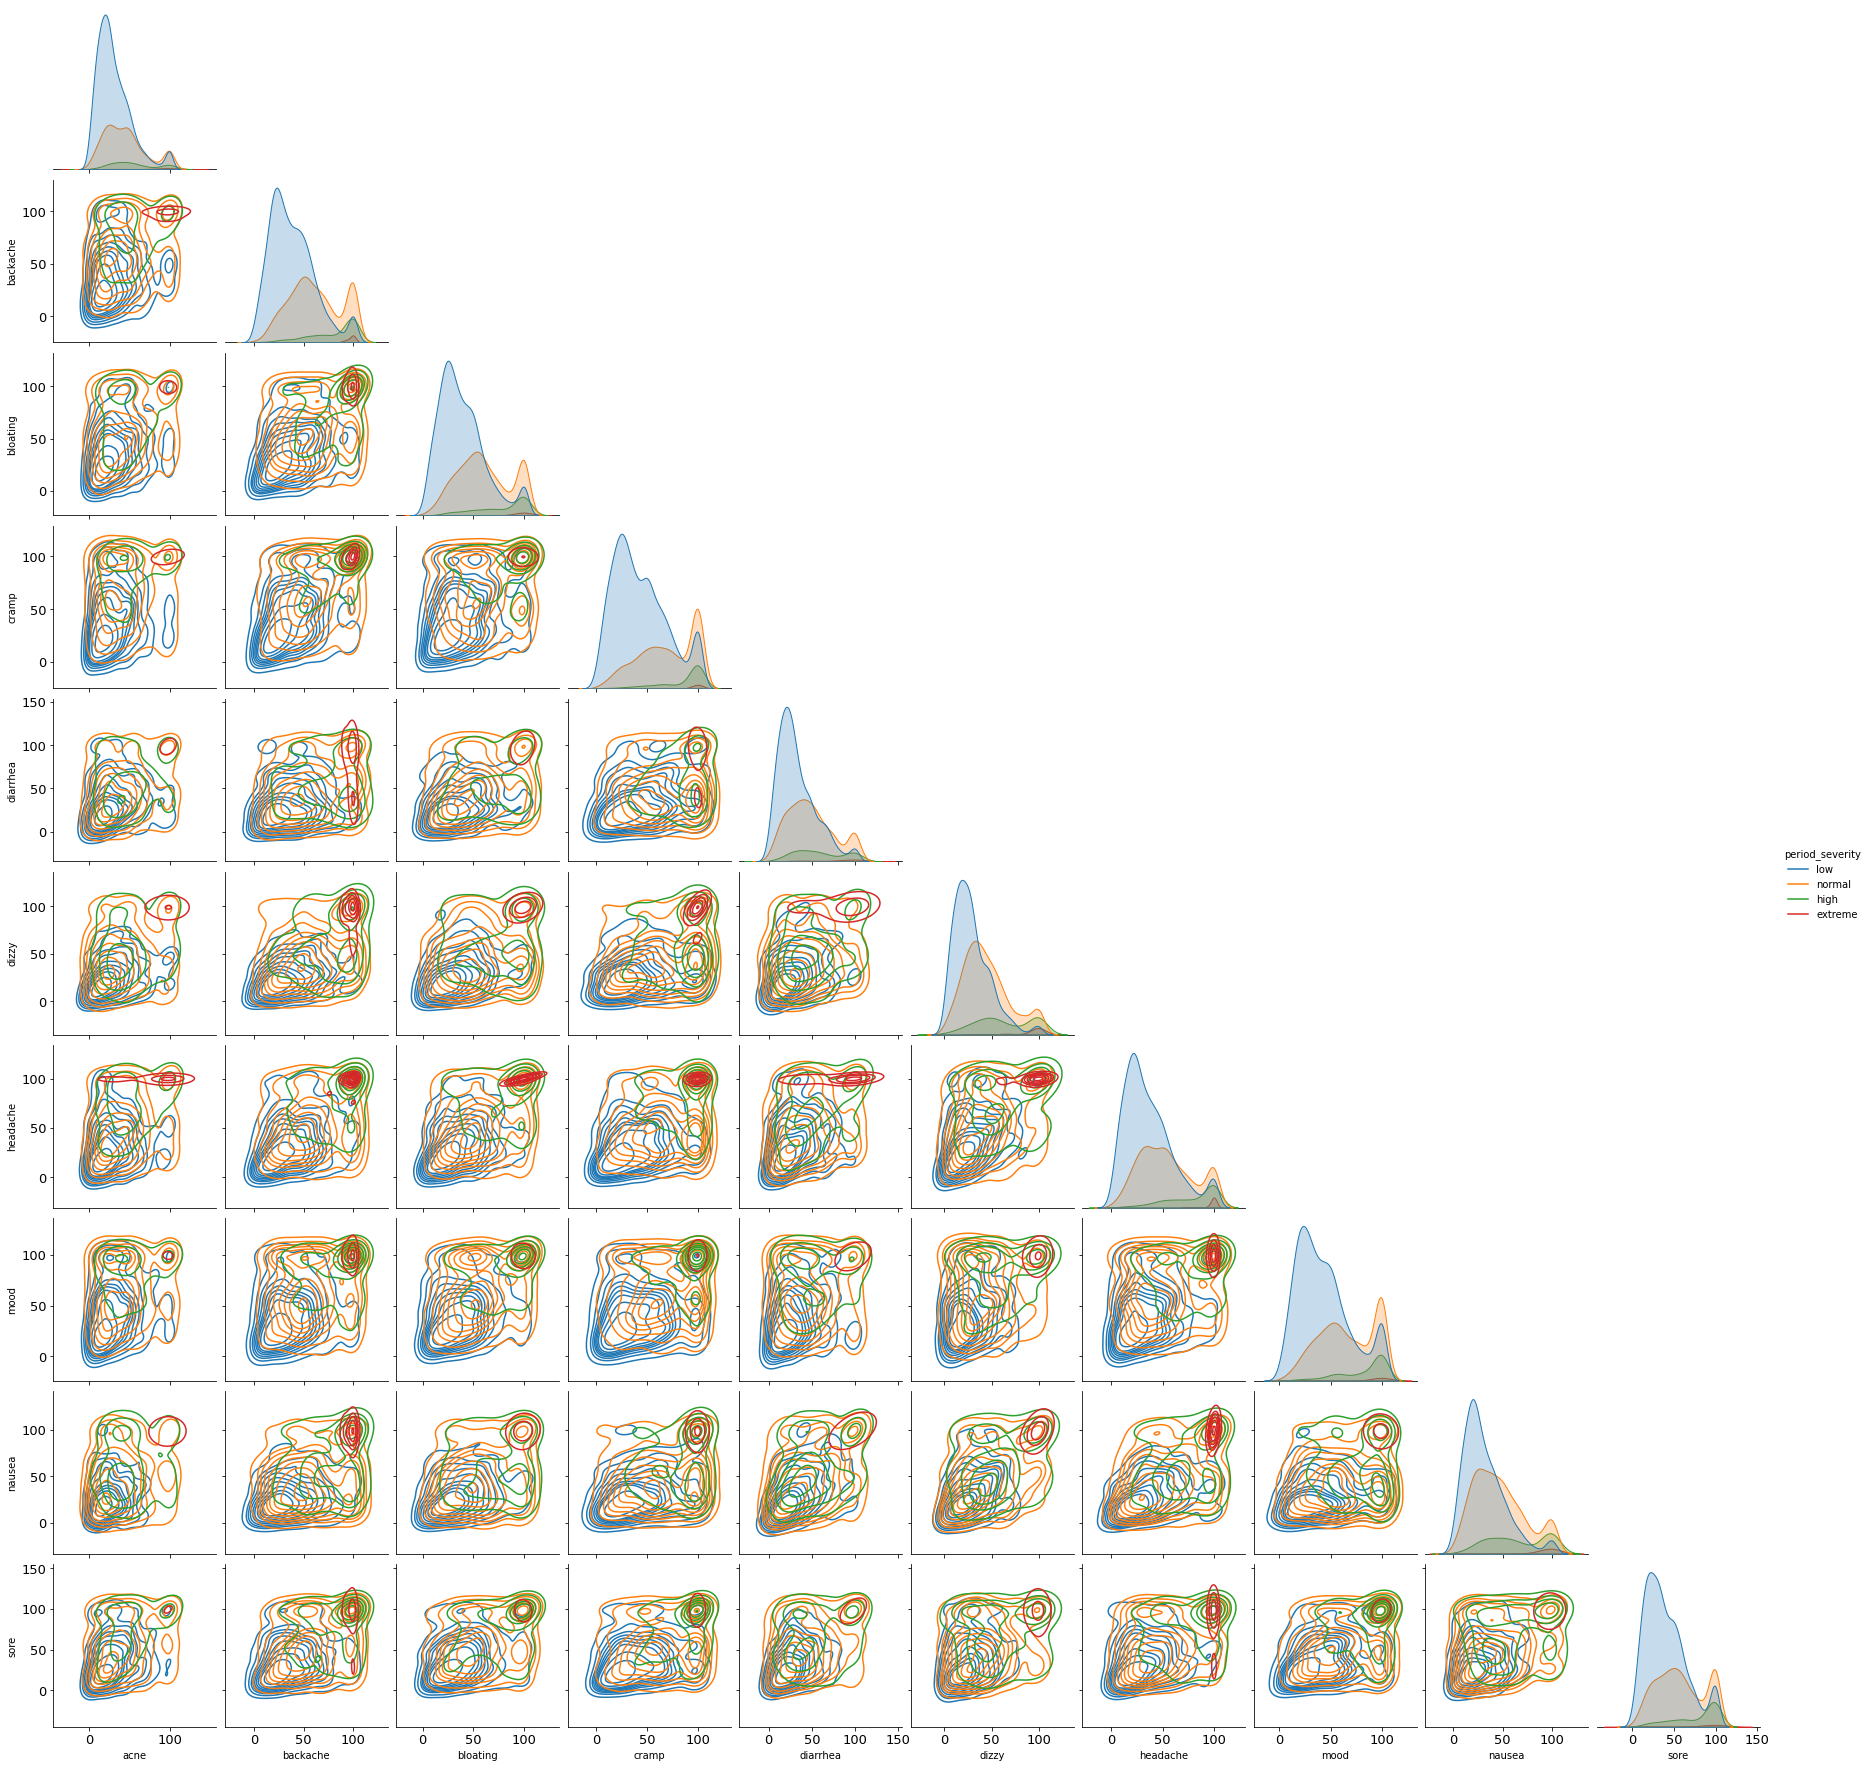

In [70]:
sns.pairplot(temp,x_vars=symptoms,y_vars=symptoms,kind="kde",hue='period_severity',corner=True)

### **Observations:**

Diarrhea vs headache/dizziness/backache graph shows that even a smaller severity value of diarrhea with a higher value of headache, backache or dizziness togetherly can be extreme severe.